# „É©„Ç§„Éñ„É©„É™

In [2]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sqlite3

print("GPU‰ΩøÁî®ÂèØÔºö" , tf.test.gpu_device_name())

GPU‰ΩøÁî®ÂèØÔºö /device:GPU:0


In [3]:
!pip install japanize-matplotlib
import japanize_matplotlib

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.1/4.1 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=62058536dca310d3c771562b744b4cc778306263c113c8d0d9779552b740c7b0
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


# „Ç¢„ÉÉ„Éó„É≠„Éº„Éâ

In [4]:
# „É¢„Éá„É´„ÅÆË™≠„ÅøËæº„Åø
from tensorflow.keras.models import load_model

# „É¢„Éá„É´„Ç¢„ÉÉ„Éó„É≠„Éº„Éâ
from google.colab import files
model_uploaded = files.upload()

# ‰øùÂ≠òÊ∏à„Åø„ÅÆ„É¢„Éá„É´„ÇíË™≠„ÅøËæº„Åø„ÄÅÊßãÈÄ†„ÇíË°®Á§∫„Åô„Çã
model = load_model('emotion_model_fer2013.keras')
print("‚úÖ „É¢„Éá„É´Ë™≠„ÅøËæº„ÅøÂÆå‰∫Ü")
model.summary()

Saving emotion_model_fer2013.keras to emotion_model_fer2013.keras
‚úÖ „É¢„Éá„É´Ë™≠„ÅøËæº„ÅøÂÆå‰∫Ü


Model: "sequential_1"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 46, 46, 64)     ‚îÇ           640 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_3           ‚îÇ (None, 46, 46, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_3 (MaxPooling2D)  ‚îÇ (None, 23, 23, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_4 (Conv2D)               ‚îÇ (None, 21, 21, 64)     ‚îÇ        36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_4           ‚îÇ (None, 21, 21, 64)     ‚îÇ           256 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_4 (MaxPooling2D)  ‚îÇ (None, 10, 10, 64)     ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_5 (Conv2D)               ‚îÇ (None, 8, 8, 128)      ‚îÇ        73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_5           ‚îÇ (None, 8, 8, 128)      ‚îÇ           512 ‚îÇ
‚îÇ (BatchNormalization)            ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_5 (MaxPooling2D)  ‚îÇ (None, 4, 4, 128)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_1 (Flatten)             ‚îÇ (None, 2048)           ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                 ‚îÇ (None, 512)           

 Total params: 3,494,359 (13.33 MB)

 Trainable params: 1,164,615 (4.44 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 2,329,232 (8.89 MB)

In [5]:
# Python„Éï„Ç°„Ç§„É´„ÅÆ„É™„É≠„Éº„ÉâÁî®
import importlib.util

# preprocessing.py, db_utils.py „Çí„Ç¢„ÉÉ„Éó„É≠„Éº„Éâ
util_uploaded = files.upload()

def import_from_upload(filename, module_name):
    spec = importlib.util.spec_from_file_location(module_name, filename)
    mod = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(mod)
    return mod

# utils/preprocessing.py „Çí„Ç§„É≥„Éù„Éº„Éà
pre = import_from_upload("preprocessing.py", "preprocessing")
# db_utils.py „ÅÆ„Ç§„É≥„Éù„Éº„Éà
db = import_from_upload("db_utils.py", "db_utils")

Saving db_utils.py to db_utils.py
Saving preprocessing.py to preprocessing.py


In [6]:
# Google ColabÁî®Ôºö„É¶„Éº„Ç∂„ÅåÁîªÂÉè„Çí„Ç¢„ÉÉ„Éó„É≠„Éº„Éâ„Åô„Çã
uploaded = files.upload()

Saving family.jpg to family.jpg
Saving my_family2.jpg to my_family2.jpg


# Ë°®ÊÉÖË™çË≠ò


üì∑ Âá¶ÁêÜ‰∏≠„ÅÆÁîªÂÉè: family.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3s/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöHappyÔºà‰ø°È†ºÂ∫¶ 0.82Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöHappyÔºà‰ø°È†ºÂ∫¶ 0.63Ôºâ


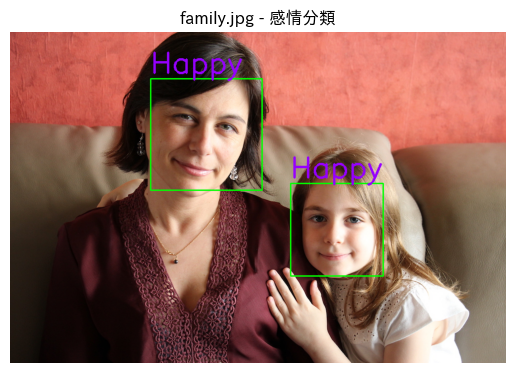


üì∑ Âá¶ÁêÜ‰∏≠„ÅÆÁîªÂÉè: my_family2.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöHappyÔºà‰ø°È†ºÂ∫¶ 0.97Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöHappyÔºà‰ø°È†ºÂ∫¶ 0.99Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 49ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöHappyÔºà‰ø°È†ºÂ∫¶ 0.84Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöHappyÔºà‰ø°È†ºÂ∫¶ 0.86Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöSadÔºà‰ø°È†ºÂ∫¶ 0.57Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöSadÔºà‰ø°È†ºÂ∫¶ 0.33Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºöSadÔºà‰ø°È†ºÂ∫¶ 0.28Ôºâ
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/ste

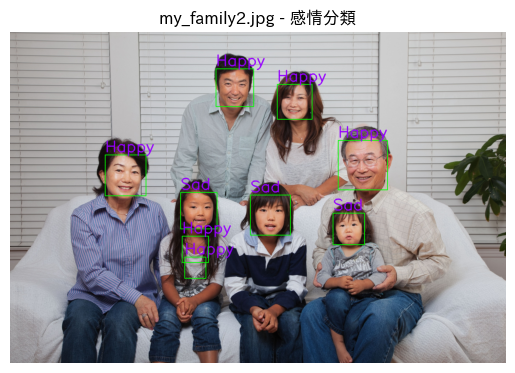

In [7]:
# ÊÑüÊÉÖ„É©„Éô„É´‰∏ÄË¶ßÔºàFER-2013Áî®Ôºâ
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Âá∫ÂäõÁî®CSVÂàùÊúüÂåñ
results = []
# DBÂàùÊúüÂåñ
# db.init_db()

# ÁîªÂÉè„ÇíË™≠„ÅøËæº„ÇÄÔºà„Ç∞„É¨„Éº„Çπ„Ç±„Éº„É´„Å´Â§âÊèõÔºâ
for file_name in uploaded.keys():
    print(f"\nüì∑ Âá¶ÁêÜ‰∏≠„ÅÆÁîªÂÉè: {file_name}")
    try:
        img_color, img_gray = pre.load_image(file_name)
    except FileNotFoundError as e:
        print(f"‚ö†Ô∏è {e}")
        continue

    faces = pre.detect_faces(img_gray)

    # Ê§úÂá∫„Åï„Çå„ÅüÈ°î„Åå„Å™„ÅÑÂ†¥Âêà
    if len(faces) == 0:
        print("‚ùå È°î„ÅåÊ§úÂá∫„Åï„Çå„Åæ„Åõ„Çì„Åß„Åó„Åü")
        results.append({
            "„Éï„Ç°„Ç§„É´Âêç": file_name,
            "Ê§úÂá∫È°îÊï∞": 0,
            "Ë°®ÊÉÖ„É©„Éô„É´": "Ê§úÂá∫„Å™„Åó",
            "‰ø°È†ºÂ∫¶": "-"
        })
        continue

    for (x, y, w, h) in faces:
        face_img = img_gray[y:y+h, x:x+w]
        face_input = pre.prepare_face(face_img)

        # Êé®Ë´ñÂÆüË°å
        prediction = model.predict(face_input)
        label_index = np.argmax(prediction)
        confidence = np.max(prediction)
        label = emotion_labels[label_index]

        # ÁµêÊûúË°®Á§∫
        print(f"üé≠ È°î„ÅÆÊÑüÊÉÖ„ÅØÔºö{label}Ôºà‰ø°È†ºÂ∫¶ {confidence:.2f}Ôºâ")
        results.append({
            "„Éï„Ç°„Ç§„É´Âêç": file_name,
            "Ê§úÂá∫È°îÊï∞": len(faces),
            "Ë°®ÊÉÖ„É©„Éô„É´": label,
            "‰ø°È†ºÂ∫¶": round(confidence, 4)
        })

        # „Éá„Éº„Çø„Éô„Éº„Çπ‰øùÂ≠ò
        # db.insert_result(file_name, len(faces), label, float(confidence))

        # ÂèØË¶ñÂåñË°®Á§∫ÔºàÊû†‰ªò„Åç„ÅßÔºâ
        cv2.rectangle(img_color, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(img_color, label, (x, y-12), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,150), 3)

    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"{file_name} - ÊÑüÊÉÖÂàÜÈ°û")
    plt.axis('off')
    plt.show()

In [26]:
# ÁµêÊûú„ÇíCSV„Å´‰øùÂ≠ò„Åó„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ
df = pd.DataFrame(results)
df.to_csv("emotion_predictions.csv", index=False, encoding='utf-8-sig')
print("‚úÖ CSV„Éï„Ç°„Ç§„É´„Å´‰øùÂ≠ò„Åó„Åæ„Åó„Åü: emotion_predictions.csv")

# Colab„Åß„ÉÄ„Ç¶„É≥„É≠„Éº„ÉâÁî®„É™„É≥„ÇØ‰ΩúÊàê
files.download("emotion_predictions.csv")

‚úÖ CSV„Éï„Ç°„Ç§„É´„Å´‰øùÂ≠ò„Åó„Åæ„Åó„Åü: emotion_predictions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# DB„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„É™„É≥„ÇØ
db_path = "emotion_results.db"
if os.path.exists(db_path):
    print(f"‚úÖ „Éá„Éº„Çø„Éô„Éº„Çπ‰øùÂ≠òÊ∏à„Åø: {db_path}")
    files.download(db_path)